In [146]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/pollution_us_2000_2016.csv"
state_csv_path = "Resources/State_2016.csv"
df = pd.read_csv(csv_path)
state_2016_df = pd.read_csv(state_csv_path)

In [148]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
df['year'] = pd.DatetimeIndex(df['Date Local']).year
df['Date Local'] = pd.to_datetime(df['Date Local'],format='%Y-%m-%d') 

In [149]:
# Delete extraneous column
df = df.drop(['Unnamed: 0','State Code','County Code','Address','Site Num','NO2 Units','O3 Units','SO2 Units','CO Units'], axis=1)
# Removing Mexico
df = df[df.State!='Country Of Mexico']
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [150]:
df.State.unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota',
       'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota',
       'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alabama',
       'Washington', 'Alaska'], dtype=object)

In [151]:
df_grouped = df.groupby(['State','Date Local']).mean()
df_grouped.head()

NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI  \
State   Date Local                                                            
Alabama 2013-12-01  17.208333               39.3              18.0     37.0   
        2013-12-02  20.687500               32.4               7.0     30.0   
        2013-12-03  14.912500               22.4              17.0     21.0   
        2013-12-04   7.825000               19.3              17.0     18.0   
        2013-12-05   8.004762               16.0               7.0     15.0   

                     O3 Mean  O3 1st Max Value  O3 1st Max Hour  O3 AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.013542             0.026              9.0    24.0   
        2013-12-02  0.009375             0.013              0.0    12.0   
        2013-12-03  0.008167             0.012             22.0    11.0   
        2013-12-04  0.011125             0.014              8.0    13.0   
        2013-12-05  0.010083             0.014             18.0    13.0   

                    SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  SO2 AQI  \
State   Date Local                                                           
Alabama 2013-12-01  0.285390               0.75              11.0      1.0   
        2013-12-02  0.531666               2.10              11.0      3.0   
        2013-12-03  0.252632               1.35              12.5      3.0   
        2013-12-04  0.123052               0.95              17.0      1.0   
        2013-12-05 -0.014285               0.60               2.5      1.0   

                     CO Mean  CO 1st Max Value  CO 1st Max Hour  CO AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.262879             0.650              8.5     6.0   
        2013-12-02  0.352812             0.485              8.0     6.0   
        2013-12-03  0.237575             0.325              4.0     3.0   
        2013-12-04  0.115152             0.220             18.5     2.0   
        2013-12-05  0.117575             0.200             17.5     2.0   

                      year  
State   Date Local          
Alabama 2013-12-01  2013.0  
        2013-12-02  2013.0  
        2013-12-03  2013.0  
        2013-12-04  2013.0  
        2013-12-05  2013.0

In [152]:
# Dropping the NA values at this point would end up losing a lot of data for O3 and CO2 data, so we want to maintain separate dfs once we get to that point. 

In [153]:
#NO2 data
NO2_data = df[["State", "County", "City","NO2 Mean","NO2 1st Max Value", "NO2 1st Max Hour", "NO2 AQI","Date Local","year"
                          ]]
NO2_data.head()

,State,County,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,22.958333,36.0,19,34,2000-01-02,2000


In [154]:
#NO2 data group it 
NO2_group = df[["State","County","City","NO2 AQI","Date Local","year"
                          ]]
NO2_group.head()

,State,County,City,NO2 AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,46,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,46,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,46,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,46,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,34,2000-01-02,2000


In [155]:
NO2_group.dtypes

State                 object
County                object
City                  object
NO2 AQI                int64
Date Local    datetime64[ns]
year                   int64
dtype: object

In [156]:
df_16 = df[df.year == 2016]

In [157]:
state_df = df_16.groupby(["State"])
state_16 = state_df[["State","NO2 AQI","O3 AQI", 'SO2 AQI', "CO AQI"
                          ]]

final_16 = state_16.mean()
final_16


,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
State,,,,
Alabama,23.093960,39.295302,5.275168,3.906040
Arizona,29.652941,37.370588,1.117647,7.788235
Arkansas,20.274725,32.824176,0.824176,4.637363
California,16.164364,32.900000,1.172965,5.664727
Colorado,42.159851,31.286245,3.947955,7.843866
Delaware,25.988095,32.047619,1.952381,4.464286
District Of Columbia,25.689655,38.913793,2.206897,3.586207
Florida,13.857143,36.868132,0.813187,7.406593
Georgia,25.333333,29.634921,0.555556,5.253968


In [162]:
state_2016_df.head()

,State,Population,Area
30,.Texas,27937492,261914
3,.California,39209127,155973
1,.Arizona,6945452,113642
18,.Nevada,2919772,109806
4,.Colorado,5540921,103730


In [183]:
x = state_2016_df['Population']
y = state_2016_df['Area']
s = final_16['NO2 AQI']
y = y.astype(np.float)
x = x.astype(np.float)

In [194]:
xs = state_2016_df['Population']
ys = state_2016_df['Area']
ss = final_16['O3 AQI']
ys = y.astype(np.float)
xs = x.astype(np.float)


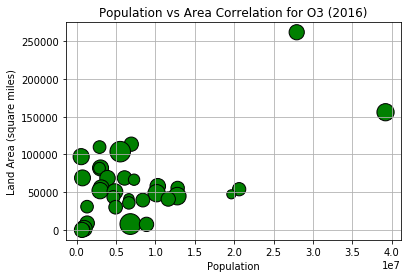

In [201]:
plt.scatter(x.values, 
            y.values, 
            s*10, c="green", 
            edgecolor="black", linewidths=1, marker="o")


plt.title("Population vs Area Correlation for O3 (2016)")
plt.ylabel("Land Area (square miles)")
plt.xlabel("Population")
plt.grid(True)

plt.savefig("Resources/O3_pop_vs_area.png")

#plt.text(10,30, "Note:\nState Population and Land Area does not direclty correlate with Air Quality")

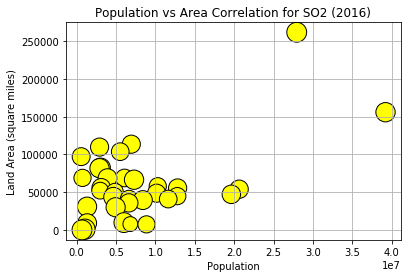

In [202]:
plt.scatter(xs.values, 
            ys.values, 
            ss*10, c="yellow", 
            edgecolor="black", linewidths=1, marker="o")


plt.title("Population vs Area Correlation for SO2 (2016)")
plt.ylabel("Land Area (square miles)")
plt.xlabel("Population")
plt.grid(True)

plt.savefig("Resources/SO2_pop_vs_area.png")


In [38]:
# Grouping the DataFrame by "Assignee"
citycounty_group = NO2_group.groupby(["State","County","City"])

citycounty_group


In [39]:
# Count how many of each component Assignees worked on and create DataFrame of the data
citycounty_grpdisplay = pd.DataFrame(citycounty_group["City"].value_counts())
citycounty_grpdisplay

City
State        County                City               City                     
Alabama      Jefferson             Birmingham         Birmingham           3126
Alaska       Fairbanks North Star  Fairbanks          Fairbanks            1974
Arizona      Maricopa              Phoenix            Phoenix             37912
                                   Scottsdale         Scottsdale           8674
             Pima                  Tucson             Tucson              23254
Arkansas     Pulaski               North Little Rock  North Little Rock   35332
California   Alameda               Berkeley           Berkeley             4460
                                   Oakland            Oakland              9746
             Contra Costa          Bethel Island      Bethel Island       23396
                                   Concord            Concord             23686
                                   Crockett           Crockett             1892
                                   Pittsburg          Pittsburg           13076
                                   San Pablo          San Pablo           21960
             Fresno                Fresno             Fresno              15302
             Humboldt              Eureka             Eureka              12200
                                   Not in a city      Not in a city        6346
             Imperial              Calexico           Calexico            22420
             Kern                  Bakersfield        Bakersfield           434
             Los Angeles           Burbank            Burbank             18870
                                   Hawthorne          Hawthorne            6046
                                   Long Beach         Long Beach          25104
                                   Los Angeles        Los Angeles         42241
                                   West Los Angeles   West Los Angeles     1120
             Orange                Costa Mesa         Costa Mesa          21606
             Riverside             Rubidoux           Rubidoux            30178
             Sacramento            Arden-Arcade       Arden-Arcade        19878
                                   Not in a city      Not in a city       13154
             San Bernardino        Fontana            Fontana             10694
                                   Victorville        Victorville         23279
             San Diego             Chula Vista        Chula Vista         14612
...                                                                         ...
South Dakota Union                 Not in a city      Not in a city        1404
Tennessee    Blount                Not in a city      Not in a city        3974
             Haywood               Not in a city      Not in a city         904
             Meigs                 Not in a city      Not in a city         964
Texas        Bexar                 Not in a city      Not in a city        3368
                                   San Antonio        San Antonio          3574
             Dallas                Dallas             Dallas              23406
             El Paso               El Paso            El Paso             36908
             Harris                Deer Park          Deer Park            7676
                                   Houston            Houston             33626
             McLennan              Waco               Waco                12480
             Travis                Austin             Austin               2170
Utah         Duchesne              Roosevelt          Roosevelt             104
             Salt Lake             Salt Lake City     Salt Lake City       6580
             Uintah                Not in a city      Not in a city        1984
Virginia     Alexandria City       Alexandria         Alexandria           5876
                                   Not in a city      Not in a city        1060
             Fairfax               Annandale          Annandale            

In [40]:
#O3 data

O3_data = df[["State", "County", "City","O3 Mean","O3 1st Max Value", "O3 1st Max Hour", "O3 AQI"
                          ]]
O3_data.head()

,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI
0,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
1,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
2,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
3,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
4,Arizona,Maricopa,Phoenix,0.013375,0.032,10,27


In [41]:
# the following two groupbys need a dropped dataframe
df_drop = df.dropna(how='any')
df_drop.count()

State                434493
County               434493
City                 434493
Date Local           434493
NO2 Mean             434493
NO2 1st Max Value    434493
NO2 1st Max Hour     434493
NO2 AQI              434493
O3 Mean              434493
O3 1st Max Value     434493
O3 1st Max Hour      434493
O3 AQI               434493
SO2 Mean             434493
SO2 1st Max Value    434493
SO2 1st Max Hour     434493
SO2 AQI              434493
CO Mean              434493
CO 1st Max Value     434493
CO 1st Max Hour      434493
CO AQI               434493
year                 434493
dtype: int64

In [42]:
#SO2 data
SO2_data = df_drop[["State","County", "City","SO2 Mean","SO2 1st Max Value", "SO2 1st Max Hour", "SO2 AQI","Date Local","year"
                   ]]
SO2_data.head()

,State,County,City,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,Date Local,year
1,Arizona,Maricopa,Phoenix,3.000000,9.0,21,13.0,2000-01-01,2000
5,Arizona,Maricopa,Phoenix,1.958333,3.0,22,4.0,2000-01-02,2000
9,Arizona,Maricopa,Phoenix,5.250000,11.0,19,16.0,2000-01-03,2000
13,Arizona,Maricopa,Phoenix,7.083333,16.0,8,23.0,2000-01-04,2000
17,Arizona,Maricopa,Phoenix,8.708333,15.0,7,21.0,2000-01-05,2000


In [43]:
#CO data
CO_data = df_drop[["State", "County", "City","CO Mean","CO 1st Max Value", "CO 1st Max Hour", "CO AQI", "Date Local","year"
                  ]]
state_CO_data = CO_data.groupby(['State']).mean()

In [44]:
state_co_group = state_CO_data.loc[:,["CO AQI"]]

In [48]:
state_CO_high = state_co_group.sort_values('CO AQI', ascending=False)
state_CO_low = state_co_group.sort_values('CO AQI', ascending=True)

In [49]:
co_high = state_CO_high.head(5)
co_low = state_CO_low.head(5)


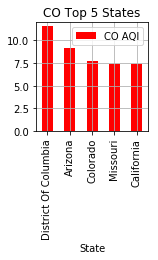

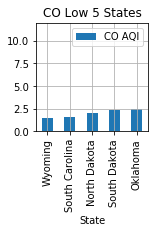

In [223]:


co_high.plot(kind="bar", grid=True, figsize=(2,2),
              title="CO Top 5 States", color='red', ylim=(0, 12))
co_low.plot(kind="bar", grid=True, figsize=(2,2),
              title="CO Low 5 States", ylim=(0, 12))
#plt.savefig("Resources/CO_state_5.png")


plt.show()

In [224]:
state_so2_data = SO2_data.groupby(['State']).mean()
state_so2_group = state_so2_data.loc[:,["SO2 AQI"]]
top_state_so2 = state_so2_group.sort_values("SO2 AQI", ascending=False)
low_state_so2 = state_so2_group.sort_values("SO2 AQI", ascending=True)
so2_high = top_state_so2.head(5)
so2_low = low_state_so2.head(5)

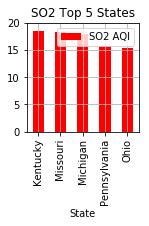

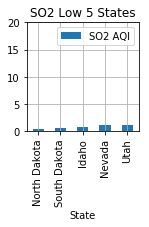

In [225]:
so2_high.plot(kind="bar", grid=True, figsize=(2,2),
              title="SO2 Top 5 States", color='red', ylim=(0, 20))
so2_low.plot(kind="bar", grid=True, figsize=(2,2),
              title="SO2 Low 5 States", ylim=(0, 20))

plt.show()

#plt.savefig("Resources/SO2_state_5.png")

In [226]:
state_o3_data = df_drop.groupby(['State']).mean()
state_o3_group = state_o3_data.loc[:,["O3 AQI"]]
top_state_o3 = state_o3_group.sort_values("O3 AQI", ascending=False)
low_state_o3 = state_o3_group.sort_values("O3 AQI", ascending=True)
o3_high = top_state_o3.head(5)
o3_low = low_state_o3.head(5)

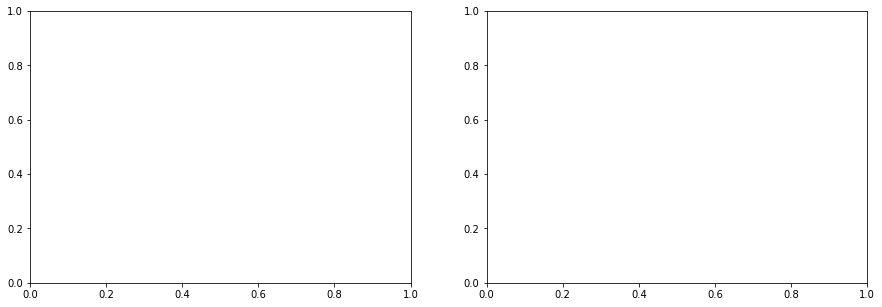

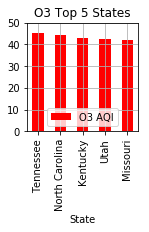

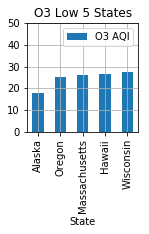

In [227]:
plt.subplots(1,2, figsize=[15,5])

o3_high.plot(kind="bar", grid=True, figsize=(2,2),
              title="O3 Top 5 States", color='red', ylim=(0, 50))
o3_low.plot(kind="bar", grid=True, figsize=(2,2),
              title="O3 Low 5 States", ylim=(0, 50))

#plt.savefig("Resources/O3_state_5.png")

plt.show()

In [228]:
state_no2_data = NO2_group.groupby(['State']).mean()
state_no2_group = state_no2_data.loc[:,["NO2 AQI"]]
top_state_no2 = state_no2_group.sort_values("NO2 AQI", ascending=False)
low_state_no2 = state_no2_group.sort_values("NO2 AQI", ascending=True)
no2_high = top_state_no2.head(5)
no2_low = low_state_no2.head(5)

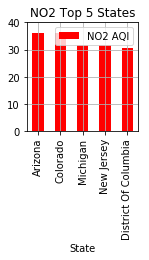

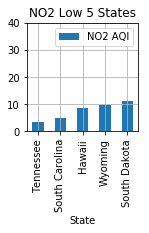

In [229]:
no2_high.plot(kind="bar", grid=True, figsize=(2,2),
              title="NO2 Top 5 States", color='red', ylim=(0, 40))
no2_low.plot(kind="bar", grid=True, figsize=(2,2),
              title="NO2 Low 5 States", ylim=(0, 40))

#plt.savefig("Resources/NO2_state_5.png")

plt.show()